## Comparison of Word Vector Representations

Compare word2vec, glove, fastttext, and vectors trained on a IG user. 

In [349]:
import spacy
import pandas as pd
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import en_core_web_sm
plt.rcParams.update(plt.rcParamsDefault)

## Import Data

In [350]:
# csv format: (doc, text), where text is a concatenation of caption, comments, and tags.
df = pd.read_csv("./hellofashionblog.csv", sep=',', 
                 encoding = 'utf8', header=None, 
                 names=["doc", "text"])
df.head()

,doc,text
0,https://scontent-arn2-1.cdninstagram.com/t51.2...,Love this Hairstyle 😍😍 Gorgeous A gift guide f...
1,https://scontent-arn2-1.cdninstagram.com/t51.2...,Cutest bffs ever 🧡🧡 Cuties! Love this! 💕 This ...
2,https://scontent-arn2-1.cdninstagram.com/t51.2...,this is precious !!! The perfect couple Casual...
3,https://scontent-arn2-1.cdninstagram.com/t51.2...,LOVE ❤️!! Gorgeous in red! Obsessed ❤️❤️ Prett...
4,https://scontent-arn2-1.cdninstagram.com/t51.2...,Love love love this pic! 🙌🏼❤️✨✨✨ U and ur girl...


## Save all text to later train word vectors

In [351]:
texts = df["text"]
texts.to_csv("./texts", header=None, index=None, sep=' ', mode='w', encoding="utf8")

## Test with Spacy built-in word2vec trained on wikipedia

In [352]:
nlp = spacy.load("en_vectors_web_lg")

A pro of these vectors are that they are very general and covers a large vocabulary. A con is that these vectors are not adapted for social media domain and does not include hashtags or emojis in the vocabulary. Additionally, the word vectors are not specialized for fashion although they cover the most general fashion items anyway. 

In [353]:
len(nlp.vocab)

1071394

In [354]:
nlp.vocab[u'jacket'].similarity(nlp.vocab[u'top'])

0.35347557

In [355]:
nlp.vocab[u'blouse'].similarity(nlp.vocab[u'top'])

0.30836126

In [332]:
nlp.vocab[u'gucci'].similarity(nlp.vocab[u'fashion'])

0.46558794

In [333]:
nlp.vocab[u'#gucci'].similarity(nlp.vocab[u'gucci'])

0.0

In [334]:
nlp.vocab[u'👖'].similarity(nlp.vocab[u'jeans'])

0.0

In [335]:
nlp.vocab[u'gucci'].similarity(nlp.vocab[u'prada'])

0.82882327

In [336]:
nlp.vocab[u'sweater'].similarity(nlp.vocab[u'shirt'])

0.7224971

In [337]:
nlp.vocab[u'sandal'].similarity(nlp.vocab[u'shoe'])

0.6599493

In [338]:
nlp.vocab[u'nike'].similarity(nlp.vocab[u'brand'])

0.30326694

In [256]:
nlp.vocab[u'coat'].similarity(nlp.vocab[u'jacket'])

0.6819554

In [339]:
nlp.vocab[u'gucci'].similarity(nlp.vocab[u'prada'])

0.82882327

## Training word vectors on the vocabulary of a single IG user

These vectors cover smaller vocabulary but what is cool is that they learn good representations for the IG domain, for instance we can learn things based on emojis and hashtags. 

Specifically, the models learns that an emoji of a pair of shoes should have a similar word representation as the word "shoes", which is cool.

The main limitation of these vectors are that they dont cover that large vocabulary, however if we combine all IG users we scraped this might give a quite good vocabulary. 

In [340]:
import gensim

In [341]:
sentences = gensim.models.word2vec.LineSentence('./texts')

In [342]:
model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

In [343]:
len(model.wv.vocab)

20363

In [347]:
model.wv.similarity('gucci', 'fashion')

0.14443075136960176

In [348]:
model.wv.similarity('sandal', 'shoe')

0.35603854553836534

In [344]:
model.wv.similarity('gucci', 'prada')

0.6818765562457898

In [345]:
model.wv.similarity('#gucci', 'gucci')

0.8475196280096744

In [346]:
model.wv.similarity('brand', 'gucci')

0.1896735043296304

In [264]:
model.wv.similarity('jacket', 'top')

0.9252516311862684

In [265]:
model.wv.similarity('sweater', 'shirt')

0.8962488866040967

In [266]:
model.wv.similarity('jacket', 'coat')

0.9431839039023355

In [267]:
model.wv.similarity('blouse', 'top')

0.8111634143985313

In [268]:
model.wv.similarity('clothes', 'clothing')

0.5985025430828631

In [269]:
model.wv.similarity('gucci', 'prada')

0.7887610913819252

In [270]:
model.wv.similarity('brand', 'price')

0.19623643347371203

In [271]:
for word, score in model.wv.most_similar(positive=["pants"]):
    print u"word: {}, score: {}".format(word, score)

word: boots, score: 0.941257238388
word: jeans, score: 0.933989703655
word: earrings, score: 0.919206023216
word: sneakers, score: 0.904149651527
word: booties, score: 0.902881622314
word: heels, score: 0.881464719772
word: sandals, score: 0.876460373402
word: shorts, score: 0.852272987366
word: trousers, score: 0.840392827988
word: sunnies, score: 0.8390006423


In [272]:
for word, score in model.wv.most_similar(positive=["shoes"]):
    print u"word: {}, score: {}".format(word, score)

word: boots, score: 0.8922265172
word: shoes!, score: 0.865082323551
word: jeans, score: 0.853918910027
word: heels, score: 0.85136193037
word: sandals, score: 0.839250683784
word: sneakers, score: 0.831335425377
word: shoes., score: 0.820267319679
word: booties, score: 0.81722342968
word: pants, score: 0.807848632336
word: shoes!!, score: 0.803301930428


In [273]:
for word, score in model.wv.most_similar(positive=["#hairgoals"]):
    print u"word: {}, score: {}".format(word, score)

word: @asmaa_sajid, score: 0.87296295166
word: yaaaas, score: 0.872364580631
word: @chelseaolson4, score: 0.870541155338
word: 😍😍❤❤, score: 0.869446992874
word: Super!, score: 0.869048476219
word: 🌼, score: 0.867843449116
word: 🙋🏼🙋🏼🙋🏼, score: 0.86744093895
word: ❤️💕, score: 0.863507628441
word: Nicee, score: 0.863362252712
word: 💐💐, score: 0.862713694572


In [274]:
model.wv.similarity('#hairgoals', '#hair')

0.7554395738590671

In [275]:
model.wv.most_similar(positive=['shoes', 'summer'])
for word, score in model.wv.most_similar(positive=["shoes", "summer"]):
    print u"word: {}, score: {}".format(word, score)

word: heels, score: 0.823256134987
word: colors, score: 0.801803767681
word: sneakers, score: 0.794907689095
word: white!, score: 0.771367192268
word: Gucci, score: 0.753215134144
word: 😍👍👍, score: 0.750167906284
word: shoes!, score: 0.742682993412
word: trousers, score: 0.737234830856
word: heels!, score: 0.734555244446
word: earrings, score: 0.734281599522


In [276]:
for word, score in model.wv.most_similar(positive=["brand"]):
    print u"word: {}, score: {}".format(word, score)

word: brand?, score: 0.866734027863
word: lipstick, score: 0.842297434807
word: nail, score: 0.823313117027
word: size, score: 0.810251951218
word: color?, score: 0.800294399261
word: polish, score: 0.781530380249
word: color/brand, score: 0.769126057625
word: wearing?, score: 0.762896418571
word: boots?, score: 0.759150207043
word: jeans?, score: 0.739863872528


In [277]:
for word, score in model.wv.most_similar(positive=[u'😍']):
    print u"word: {}, score: {}".format(word, score)

word: 😍😍, score: 0.950025439262
word: 😍😍😍, score: 0.935811936855
word: 😍😍😍😍, score: 0.902009904385
word: 😻, score: 0.846235215664
word: 😍😍😍😍😍, score: 0.833479881287
word: 💕💕💕, score: 0.801190376282
word: !!!, score: 0.791263103485
word: 😍❤️, score: 0.790177702904
word: !!!!, score: 0.743277668953
word: tho, score: 0.737681388855


In [278]:
for word, score in model.wv.most_similar(positive=[u'👟']):
    print u"word: {}, score: {}".format(word, score)

word: Distressed, score: 0.92366206646
word: NB, score: 0.911652326584
word: Camo, score: 0.910668194294
word: @aminahjillil, score: 0.907103657722
word: @kellkolling, score: 0.906461238861
word: @love_sf, score: 0.905635237694
word: @evelena_skrip, score: 0.899766266346
word: Black!, score: 0.899739742279
word: @annamariesilerio, score: 0.897935271263
word: dainty, score: 0.897850453854


In [279]:
for word, score in model.wv.most_similar(positive=[u'👜']):
    print u"word: {}, score: {}".format(word, score)

word: @foreverhhy, score: 0.948263645172
word: такую, score: 0.945111989975
word: yasss, score: 0.945105433464
word: 👏🏽👏🏽👏🏽, score: 0.942018985748
word: @miaangeli, score: 0.94129139185
word: PRETTY, score: 0.941198825836
word: Achei, score: 0.9409314394
word: 📸🌸, score: 0.940166473389
word: @micalquinonesr, score: 0.938952624798
word: @sandyalamode, score: 0.937922954559


In [280]:
print "\xF0\x9F\x91\x96".decode("utf8")

👖


In [281]:
model.wv.similarity(u'👖', 'jeans')

0.41542522960537565

In [282]:
model.wv.similarity(u'👖', 'dress')

0.08684243275942807

In [283]:
model.wv.similarity(u'👗', 'dress')

0.31728460781396045

In [284]:
model.wv.similarity(u'👗', 'shoe')

0.23042239657441727

In [285]:
model.wv.similarity(u'👒', 'hat')

0.4509832137680093

In [286]:
model.wv.similarity(u'👒', 'jeans')

0.43047554562420026

In [287]:
model.wv.similarity(u'👜', 'handbag')

0.6260851292036533

In [288]:
model.wv.similarity(u'👜', 'dress')

0.11341344651998533

In [289]:
model.wv.similarity(u'👛', 'purse')

0.3402638059448267

In [290]:
model.wv.similarity(u'👛', 'shirt')

0.1791288895600077

In [291]:
model.wv.similarity(u'👙', 'bikini')

0.6023650539534895

In [292]:
model.wv.similarity(u'👙', 'shoe')

0.35869383989106585

In [293]:
model.wv.similarity(u'👢', 'boots')

0.23222487335231465

In [294]:
model.wv.similarity(u'👠', 'heels')

0.4850658582898505

In [295]:
model.wv.similarity(u'👠', 'shoe')

0.574871672600717

In [296]:
model.wv.similarity(u'👠', 'shirt')

0.11804682700518791

In [297]:
model.wv.similarity(u'👟', 'shoe')

0.40280035992020613

In [298]:
model.wv.similarity(u'👟', 'trainer')

0.4837340109701229

In [299]:
model.wv.similarity(u'👟', 'sneaker')

0.8329597381374767

In [300]:
model.wv.similarity(u'😎', 'sunglasses')

0.38819570058919217

In [301]:
model.wv.similarity(u'👓', 'sunglasses')

0.449638624505211

In [302]:
model.wv.similarity(u'👓', 'glasses')

0.42253216827577567

In [303]:
model.wv.similarity(u'👔', 'tie')

0.419217502146432

In [304]:
#Save vectors
model.wv.save_word2vec_format("./hellofashionblog/hellofashionblog.vec")

In [305]:
len(model.wv.vocab)

20363

# Alternative way to import binary, a bit faster but more commands

Run this in terminal:

- `tail -n +2 hellofashionblog/hellofashionblog.txt > hellofashionblog/hellofashionblog.txt.new && mv -f hellofashionblog/hellofashionblog.txt.new hellofashionblog/hellofashionblog.txt`

- `bzip2 hellofashionblog/hellofashionblog.txt`

- import and write in spacy binary :

`spacy.vocab.write_binary_vectors('hellofashionblog.txt.bz2','hellofashionblog.bin')`

- import in spacy:

`nlp.vocab.load_vectors_from_bin_loc('hellofashionblog.bin')`

or in spacy 2.0:

- `nlp.vocab.load_vectors("file.txt.bz2")`

In [306]:
def load_vecs(vectors_loc, nlp):
    with open(vectors_loc, 'rb') as file_:
            header = file_.readline()
            nr_row, nr_dim = header.split()
            nlp.vocab.reset_vectors(width=int(nr_dim))
            i = 0
            for i, line in enumerate(file_):
                if i % 200 == 0:
                    print "loaded {0} % of the vectors".format(float(i)/float(len(model.wv.vocab)))
                line = line.rstrip().decode('utf8')
                pieces = line.rsplit(' ', int(nr_dim))
                word = pieces[0]
                vector = np.asarray([float(v) for v in pieces[1:]], dtype='f')
                nlp.vocab.set_vector(word, vector)  # add the vectors to the vocab

In [228]:
load_vecs("./hellofashionblog/hellofashionblog.vec", nlp)

loaded 0.0982173550066 % of the vectors
loaded 0.108039090507 % of the vectors
loaded 0.117860826008 % of the vectors
loaded 0.127682561509 % of the vectors
loaded 0.137504297009 % of the vectors
loaded 0.14732603251 % of the vectors
loaded 0.157147768011 % of the vectors
loaded 0.166969503511 % of the vectors
loaded 0.176791239012 % of the vectors
loaded 0.186612974513 % of the vectors
loaded 0.196434710013 % of the vectors
loaded 0.206256445514 % of the vectors
loaded 0.216078181015 % of the vectors
loaded 0.225899916515 % of the vectors
loaded 0.235721652016 % of the vectors
loaded 0.245543387517 % of the vectors
loaded 0.255365123017 % of the vectors
loaded 0.265186858518 % of the vectors
loaded 0.275008594019 % of the vectors
loaded 0.284830329519 % of the vectors
loaded 0.29465206502 % of the vectors
loaded 0.304473800521 % of the vectors
loaded 0.314295536021 % of the vectors
loaded 0.324117271522 % of the vectors
loaded 0.333939007023 % of the vectors
loaded 0.343760742523 % of

In [233]:
nlp.vocab[u'gucci'].similarity(nlp.vocab[u'prada'])

0.73298657

In [234]:
nlp.vocab[u'sweater'].similarity(nlp.vocab[u'shirt'])

0.88542664

In [235]:
nlp.vocab[u'👜'].similarity(nlp.vocab[u'handbag'])

0.62139213

In [236]:
nlp.vocab[u'👟'].similarity(nlp.vocab[u'sneaker'])

0.8164138

## Compress vectors to 2D and Plot

In [310]:
# Plot specific words in 2D space
# Apply dim-reduction with T-SNE to matrix of the word vectors (dimension 100 so cant visualize) and plot
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.savefig('figures/closest_words_scatter.pdf', format='pdf', dpi=1000)
    plt.show()

<IPython.core.display.Javascript object>


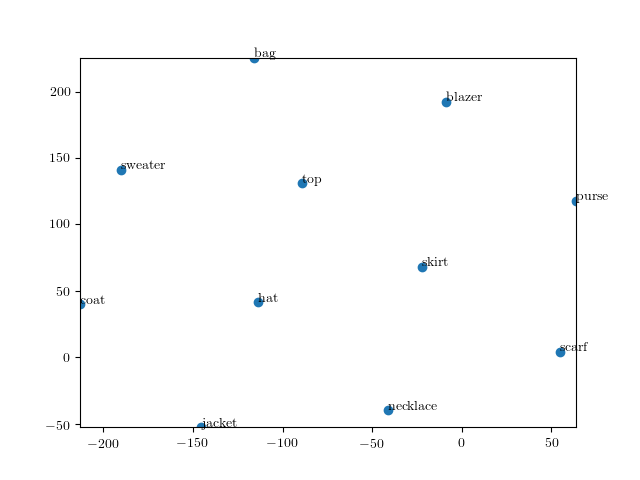

In [311]:
display_closestwords_tsnescatterplot(model, 'jacket')

In [324]:
# Plot 100 words
vocab = list(model.wv.vocab)[0:100]
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[0:100])

<IPython.core.display.Javascript object>


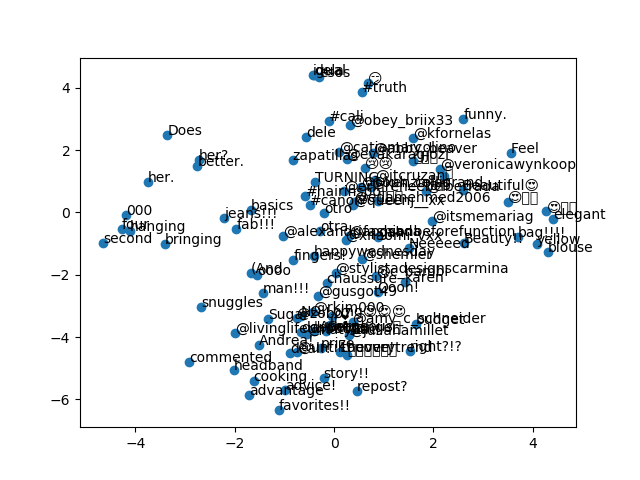

In [326]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.savefig('figures/100_words_scatter.pdf', format='pdf', dpi=1000)
plt.show()

In [314]:
vocab

[u'#truth',
 u'\U0001f49d\U0001f49d\U0001f49d',
 u'Gorgeous\U0001f497',
 u'jeans!!!',
 u'right?!?',
 u'headband',
 u'@queenj__xx',
 u'gah',
 u'@xnaomi_vxx',
 u'yellow',
 u'Sugar',
 u'four',
 u'@stylistadesignscarmina',
 u'deal!!',
 u'Does',
 u'\U0001f44c\U0001f3fe\U0001f44c\U0001f3fe\U0001f44c\U0001f3fe',
 u'@natykac',
 u'hanging',
 u'story!!',
 u'(And',
 u'Oooh!',
 u'@fberrada',
 u'@obey_briix33',
 u'otro',
 u'@jtcruzan',
 u'zapatillas',
 u'@itsmemariag',
 u'@veronicawynkoop',
 u'advantage',
 u'happywednesday',
 u'"Amen!',
 u'Beauty!!',
 u'@kenzielegrand',
 u'otra',
 u'igual',
 u'doppelg\xe4nger',
 u'repost?',
 u'fab!!!',
 u'favorites!!',
 u'#hairinspo',
 u'@c_bambi',
 u'\U0001f60d\U0001f64c\U0001f3fc',
 u'\U0001f60d\U0001f64c\U0001f3fd',
 u'dela',
 u'@untiltheverytrend',
 u'advice!',
 u'better.',
 u'dele',
 u'@soph_collis',
 u'@shemler',
 u'Looove!',
 u'Andrea!',
 u'@erinreneebel',
 u'@abby_beaver',
 u'fingers!',
 u'TURNING',
 u'bringing',
 u'@edamehmed2006',
 u'basics',
 u'prize',
 

## FastText

Test to load in the pre-trained vectors using FastText algorithm by Facebook. These vectors are also trained on Wikipedia but FastText tend to give better results than word2vec. 

** NOTE: it takes forever (24h) to load the FastText vectors and it gave similar results as word2vec**

In [ ]:
vectors_loc = "fasttext/wiki.en.vec"
load_vecs(vectors_loc, nlp)

In [ ]:
nlp.vocab[u'gucci'].similarity(nlp.vocab[u'prada'])

In [ ]:
nlp.vocab[u'sweater'].similarity(nlp.vocab[u'shirt'])

## Load Glove Vectors 

In [241]:
nlp = spacy.load('en', vectors='en_glove_cc_300_1m_vectors')

In [243]:
nlp.vocab[u'gucci'].similarity(nlp.vocab[u'prada'])